# Exploratory Data Analysis

## Roles to Explore:

In [55]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# setting plots theme
sns.set_theme(style="ticks")

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

# Filter for Data Analyst Roles

In [56]:
df_DA = df[df["job_title_short"].isin(["Data Analyst"])].copy()

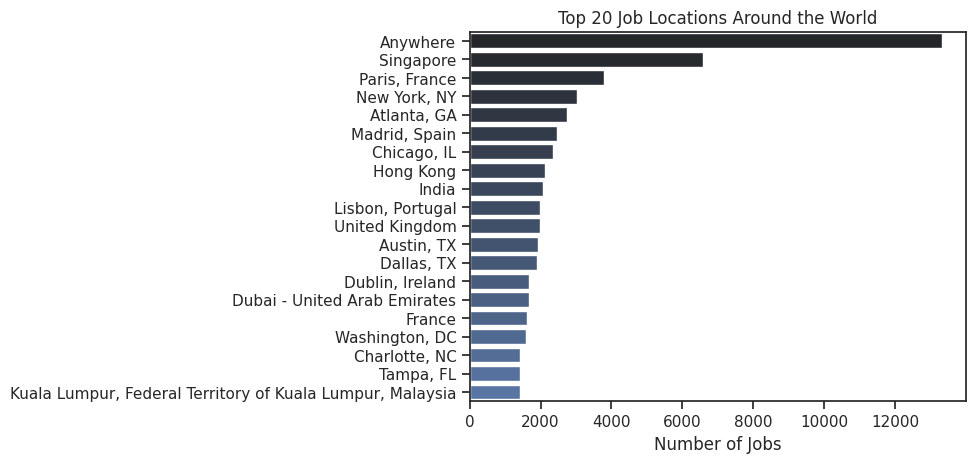

In [69]:
top=20
top_locations = df_DA["job_location"].value_counts().to_frame().head(top)
fig, ax = plt.subplots()
sns.barplot(data=top_locations, x="count", y=top_locations.index, palette="dark:b", ax=ax)
ax.set_title(f"Top {top} Job Locations Around the World")
ax.set_ylabel("")
ax.set_xlabel("Number of Jobs", )
plt.show()

In [58]:
cols = df_DA.select_dtypes(include=["bool"]).columns.to_list()
titles = [" ".join(col.split("_")).title() for col in cols]
columns = dict(zip(cols,titles))
columns

{'job_work_from_home': 'Job Work From Home',
 'job_no_degree_mention': 'Job No Degree Mention',
 'job_health_insurance': 'Job Health Insurance'}

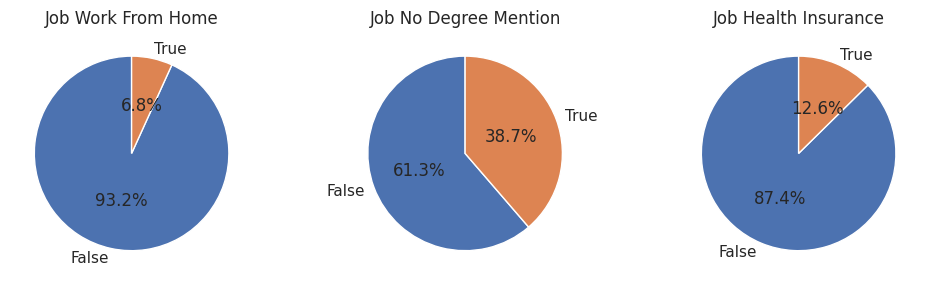

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=len(columns), figsize=(10,3))
for i, (col, title) in enumerate(columns.items()):
    labels = df_DA[col].value_counts().index
    counts = df_DA[col].value_counts().values
    ax[i].pie(counts, labels=labels, startangle=90, autopct="%1.1f%%", pctdistance=0.5)
    ax[i].set_title(title)
fig.tight_layout()
plt.show()

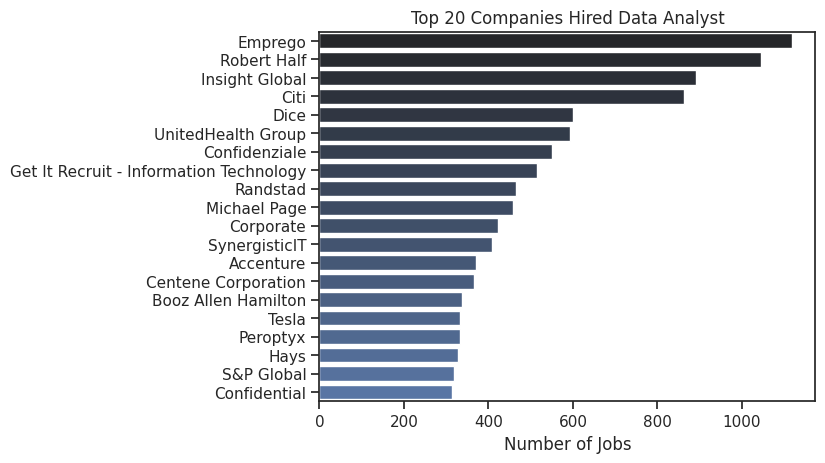

In [75]:
top=20
top_locations = df_DA["company_name"].value_counts().to_frame().head(top)
fig, ax = plt.subplots()
sns.barplot(data=top_locations, x="count", y=top_locations.index, palette="dark:b", ax=ax)
ax.set_title(f"Top {top} Companies Hired Data Analyst")
ax.set_ylabel("")
ax.set_xlabel("Number of Jobs", )
plt.show()

''